In [1]:
import numpy as np
import struct as st
import matplotlib.pyplot as Plt
from sklearn.model_selection import train_test_split

In [9]:
def NeuralNet(X,Y,h,n, alpha, nob, ite): 
    batch_size = Y.shape[1]//nob
    
    
    X = (X - X.min(axis = 0))/(X.max(axis = 0)-X.min(axis = 0))
 #Parameters for first layer
    w1 = 2/np.sqrt(n)*np.random.randn(h, 784)
    b1 = np.zeros((h,1))
 #Parameters for second layer
    w2 = 2/np.sqrt(h)*np.random.randn(10, h)
    b2 = np.zeros((10,1))
    i = 0
    while True:
  #First Layer
        for j in range(nob):
            
            #creating mini batches for faster optimization
            X1 = X[:,j*batch_size:(j+1)*batch_size]
            Y1 = Y[:,j*batch_size:(j+1)*batch_size]
            z1 = np.dot(w1,X1) + b1 
            a1 = np.where(z1>0, z1, 0.01*z1) #Leaky ReLU Activation Function for Layer 1
    #Creating Batches
            a1 = (a1 - a1.mean(axis = 0))/a1.std(axis = 0)   
            #Second Layer
            z2 = np.dot(w2, a1) + b2
            a2 = 1/(1+ np.exp(-z2)) #Sigmoid Activation Function for Layer 2
            
    #Let us do backpropagation now
    
            dLda2 = (1/Y1.shape[1])*(a2 - Y1) 
            da2dz2 = a2*(1-a2)
            dz2dw2 = a1
            dz2db2 = np.ones((X1.shape[1],1)) 
            dz2da1 = w2
            da1dz1 = np.where(a1<0, 0.01, 1)
            dz1dw1 = X1
            dz1db1 = np.ones((X1.shape[1], 1))
            
            dw2 = np.dot(dLda2*da2dz2, dz2dw2.T)
            db2 = np.dot(dLda2*da2dz2, dz2db2)
            #print(dw2.shape, db2.shape)
            dw1 = np.dot(((np.dot(dz2da1.T, dLda2*da2dz2)))*da1dz1, dz1dw1.T)
            db1 = np.dot(((np.dot(dz2da1.T, dLda2*da2dz2)))*da1dz1, dz1db1)
            #print(dw1.shape, db1.shape)
            
    #Parameter Update
            w2 = w2 - alpha*dw2
            w1 = w1 - alpha*dw1
            b2 = b2 - alpha*db2
            b1 = b1 - alpha*db1
        i+=1
        z1 = np.dot(w1,X) + b1 
        a1 = np.where(z1>0, z1, 0.01*z1) #Leaky ReLU Activation Function for Layer 1
    #Batch Normalization
        a1 = (a1 - a1.mean(axis = 0))/a1.std(axis = 0)   
    #Second Layer
        z2 = np.dot(w2, a1) + b2
        a2 = 1/(1+ np.exp(-z2))
        error = np.sum((a2 - Y)**2)
        print(error, i)
        Plt.scatter(i,error,color='red',label='loss')
        if i == ite:
            return w1, w2, b1, b2
    Plt.title("Loss Optimization")
    Plt.xlabel("Iterations")
    Plt.ylabel("Loss")
    Plt.show()

In [10]:
 #Train data extraction

filename = {'images' : '/home/ravish/Downloads/Assignment-4/train-images.idx3-ubyte' ,'labels' : '/home/ravish/Downloads/Assignment-4/train-labels.idx1-ubyte'}
#reading images data
train_imagesfile = open(filename['images'],'rb')
magicimages = st.unpack('>4B',train_imagesfile.read(4))
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of column
nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
images = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((nImg,nR*nC))
#reading label data
train_labelfile = open(filename['labels'],'rb')
magiclabel = st.unpack('>4B',train_labelfile.read(4))
nLabels = st.unpack('>I',train_labelfile.read(4))[0] #num of labels
labels = np.asarray(st.unpack('>'+'B'*nLabels,train_labelfile.read(nLabels))).reshape((nLabels))


In [11]:
#Creating the labels matrix as a binary matrix
labelsmatrix = np.zeros((nLabels, 10))
for i in range(nLabels):
    labelsmatrix[i][labels[i]] = 1
    #Splitting data in to training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labelsmatrix, test_size=0.2, random_state = 2)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

46257.3562681811 1
46017.30391607946 2
46162.06989553254 3
42120.55661745667 4
37060.0289907846 5
37074.81071798948 6
30817.876790074813 7
21957.59988479812 8
21900.49844630799 9
19839.62365565397 10
18726.41052344527 11
13008.576104158126 12
12912.629532945642 13
13066.683089594755 14
13101.854587106323 15
11285.56546842295 16
8647.514166080193 17
10080.510650816172 18
8032.312165233826 19
7452.627783512462 20
7189.2552480282875 21
6956.931520578857 22
6508.991870474002 23
6035.133694127067 24
5886.882913532079 25
5546.908083814502 26
5267.052556045003 27
5073.247812904612 28
5034.586425091065 29
4916.589613908949 30
4663.188746996084 31
4528.41584416785 32
4361.062198566244 33
4301.605983166233 34
4206.418227143421 35
4077.9798233942597 36
3951.90965991205 37
3886.9723241341817 38
3833.795056586379 39
3840.5620063779747 40
3783.772503478776 41
3871.548460053018 42
3754.5658992848644 43
3627.10368354059 44
3638.005726669953 45
3613.201133842167 46
3576.5151084140807 47
3552.5494251626

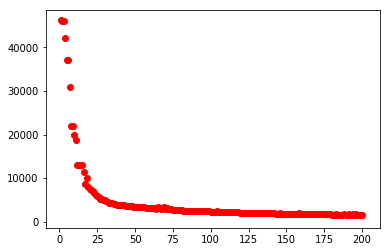

In [12]:
#Passing in arguments
w1, w2, b1, b2 = NeuralNet(X_train, y_train, 200, 784, .5, 96, 200)

In [13]:
#For accuracy calculation on validation set
X_test=(X_test-X_test.min(axis=0))/(X_test.max(axis=0)-X_test.min(axis=0))
z1 = np.dot(w1,X_test) + b1 
a1 = np.where(z1>0, z1, 0.01*z1) #Leaky ReLU Activation Function for Layer 1
a1 = (a1 - a1.mean(axis = 0))/a1.std(axis = 0)            
z2 = np.dot(w2, a1) + b2
a2 = 1/(1+ np.exp(-z2)) #Sigmoid Activation Function for Layer 2

k=0
m1 = np.max(a2, axis = 0)
m2 = np.max(a2*y_test, axis = 0)
for i in range(y_test.shape[1]):
    if m1[i]==m2[i]:
        k+=1
        
print("Accuracy is:", k*100/y_test.shape[1])

Accuracy is: 96.95833333333333


In [14]:
#Extracting of text data

filename = {'images1' : '/home/ravish/Downloads/Assignment-4/t10k-images.idx3-ubyte' ,'labels1' : '/home/ravish/Downloads/Assignment-4/t10k-labels.idx1-ubyte'}
#reading images data
test_imagesfile = open(filename['images1'],'rb')
magicimages = st.unpack('>4B',test_imagesfile.read(4))
nImg = st.unpack('>I',test_imagesfile.read(4))[0] #num of images
nR = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',test_imagesfile.read(4))[0] #num of column
nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
images1= 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,test_imagesfile.read(nBytesTotal))).reshape((nImg,nR*nC))
#reading label data
test_labelfile = open(filename['labels1'],'rb')
magiclabel = st.unpack('>4B',test_labelfile.read(4))
nLabels = st.unpack('>I',test_labelfile.read(4))[0] #num of labels
labels1= np.asarray(st.unpack('>'+'B'*nLabels,test_labelfile.read(nLabels))).reshape((nLabels))

In [15]:
#Creating the labels matrix as binary matrix
labelsmatrix1 = np.zeros((nLabels, 10))
for i in range(nLabels):
    labelsmatrix1[i][labels1[i]] = 1  
images1=images1.T
labelsmatrix1 = labelsmatrix1.T

In [16]:
#For accuracy calculation on test set data
images1=(images1-images1.min(axis=0))/(images1.max(axis=0)-images1.min(axis=0))
z1 = np.dot(w1,images1) + b1 
a1 = np.where(z1>0, z1, 0.01*z1) #Leaky ReLU Activation Function for Layer 1
a1 = (a1 - a1.mean(axis = 0))/a1.std(axis = 0)            
z2 = np.dot(w2, a1) + b2
a2 = 1/(1+ np.exp(-z2)) #Sigmoid Activation Function for Layer 2

k=0
m1 = np.max(a2, axis = 0)
m2 = np.max(a2*labelsmatrix1, axis = 0)
for i in range(labelsmatrix1.shape[1]):
    if m1[i]==m2[i]:
        k+=1
        
print("Accuracy is:", k*100/labelsmatrix1.shape[1])
        

Accuracy is: 97.21
